## **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### **LOAD-DATASET**

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f"Shape of Training Data : {x_train.shape}")
print(f"Shape of Testing Data : {x_test.shape}")

4431872/4422102 [==============================] - 0s 0us/step
Shape of Training Data : (60000, 28, 28)
Shape of Testing Data : (10000, 28, 28)


### **Let's try to visualise some samples**

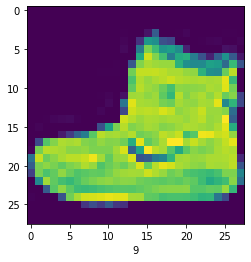

In [3]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

## **Normalize the Dataset**

In [4]:
x_train = x_train/255
x_test = x_test/255

## **Building up the Model**

In [7]:
# padding = valid (means no padding) by default
# padding = same (pad such that output is same as input)

In [5]:
# without padding
model = keras.Sequential([
      keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
      keras.layers.MaxPooling2D(pool_size=(2,2)),

      keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      keras.layers.MaxPooling2D(pool_size=(2,2)),

      keras.layers.Flatten(),
      keras.layers.Dense(64,activation='relu'),
      keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 21s 5ms/step - loss: 0.4790 - accuracy: 0.8265
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3280 - accuracy: 0.8806
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2794 - accuracy: 0.8977
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2476 - accuracy: 0.9087
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2223 - accuracy: 0.9181
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2009 - accuracy: 0.9254
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1829 - accuracy: 0.9323
Epoch 8/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1669 - accuracy: 0.9383
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1528 - accuracy: 0.9434
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - l

##### Checking the Accuracy of the model

In [6]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9792 - accuracy: 0.8976


[0.9791805744171143, 0.897599995136261]

In [8]:
# With padding
model1 = keras.Sequential([
      keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
      keras.layers.MaxPooling2D(pool_size=(2,2)),

      keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
      keras.layers.MaxPooling2D(pool_size=(2,2)),

      keras.layers.Flatten(),
      keras.layers.Dense(64,activation='relu'),
      keras.layers.Dense(10,activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4109 - accuracy: 0.8522
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2704 - accuracy: 0.9026
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2264 - accuracy: 0.9168
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1957 - accuracy: 0.9286
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1719 - accuracy: 0.9358
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1486 - accuracy: 0.9442
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1304 - accuracy: 0.9517
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1136 - accuracy: 0.9577
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0981 - accuracy: 0.9637
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [9]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2659 - accuracy: 0.9196


[0.2659291625022888, 0.9196000099182129]

## **CLassification Report**

In [10]:
from sklearn.metrics import classification_report

y_pred = model1.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.85      0.89      0.87      1000
           3       0.91      0.92      0.92      1000
           4       0.87      0.88      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.74      0.77      1000
           7       0.94      0.99      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [11]:
y_classes[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [12]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)